<a href="https://colab.research.google.com/github/YashLimkar/customer-segmentation-ml/blob/main/Customer_Segmentation_with_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

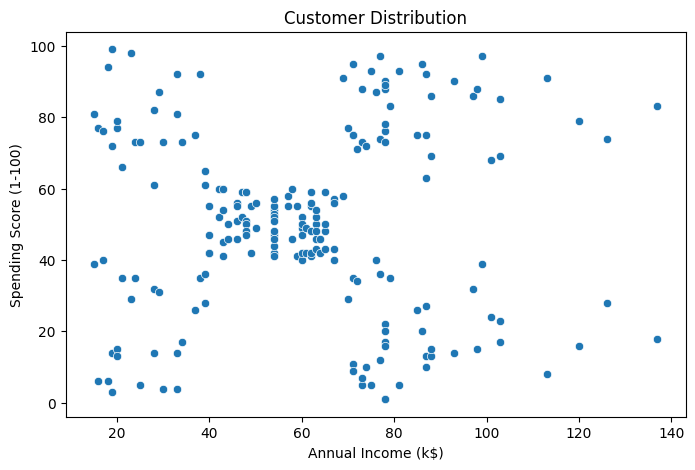

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Customer Distribution")
plt.show()

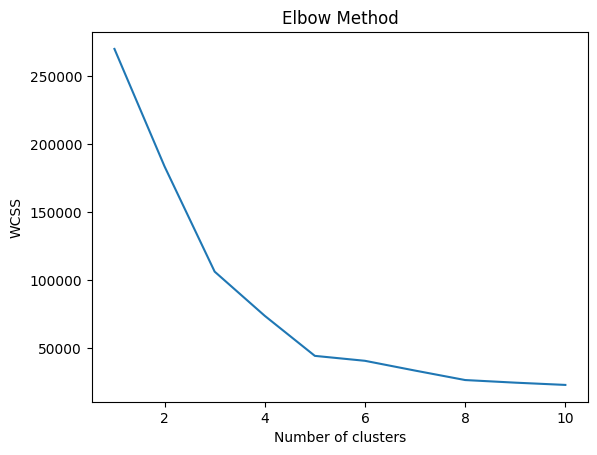

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add clusters to dataframe
df['Cluster'] = y_kmeans

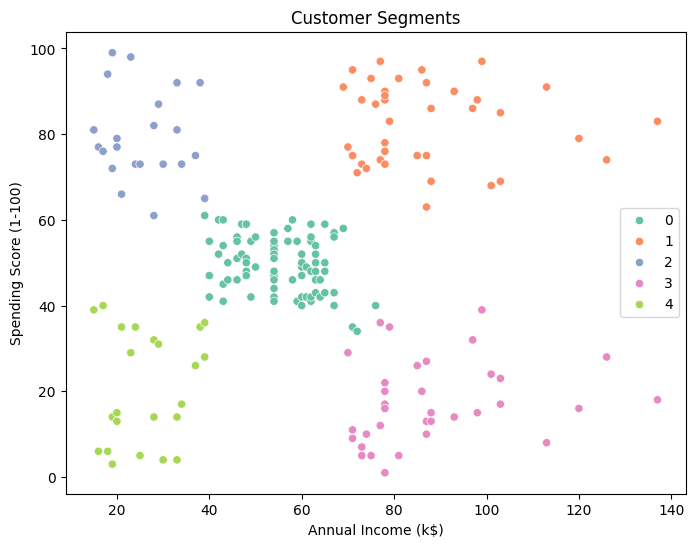

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X["Annual Income (k$)"], y=X["Spending Score (1-100)"], hue=y_kmeans, palette='Set2')
plt.title("Customer Segments")
plt.show()